In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('iris.csv')

In [4]:
df.columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

In [5]:
 df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
from sklearn.preprocessing import MinMaxScaler

# Normalize numeric columns
numeric_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
df.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0.222222,0.625000,0.067797,0.041667,setosa
1,0.166667,0.416667,0.067797,0.041667,setosa
2,0.111111,0.500000,0.050847,0.041667,setosa
3,0.083333,0.458333,0.084746,0.041667,setosa
4,0.194444,0.666667,0.067797,0.041667,setosa


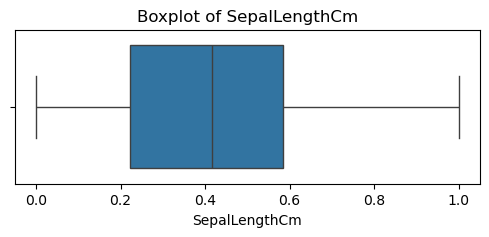

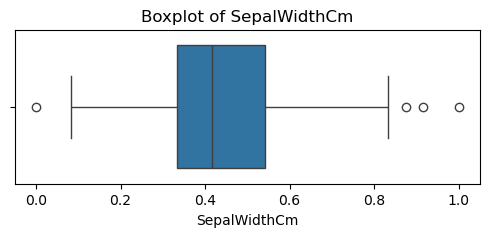

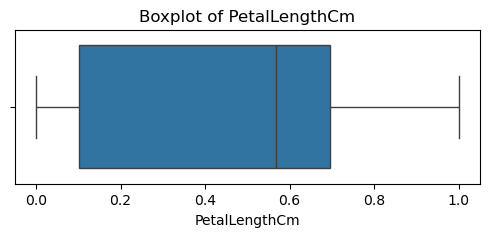

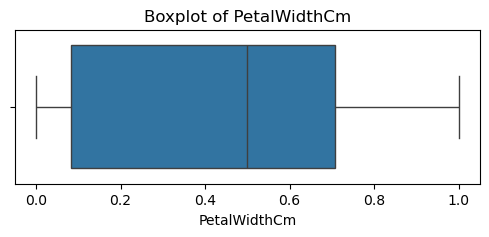

In [11]:
for col in numeric_cols:
    plt.figure(figsize=(6,2))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [12]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower, lower, np.where(df[col] > upper, upper, df[col]))

df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0.222222,0.625000,0.067797,0.041667,setosa
1,0.166667,0.416667,0.067797,0.041667,setosa
2,0.111111,0.500000,0.050847,0.041667,setosa
3,0.083333,0.458333,0.084746,0.041667,setosa
4,0.194444,0.666667,0.067797,0.041667,setosa


In [13]:
df['PetalLength_log'] = np.log1p(df['PetalLengthCm'])


In [14]:
df['PetalLengthCm'].skew()
df['PetalLength_log'].skew()

-0.41851664153416773

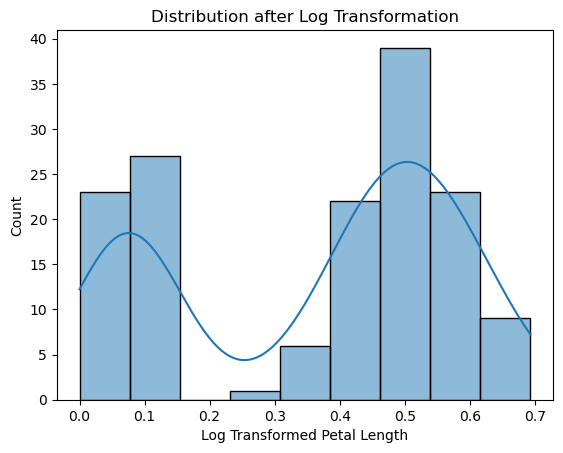

In [15]:
sns.histplot(df['PetalLength_log'], kde=True)
plt.title("Distribution after Log Transformation")
plt.xlabel("Log Transformed Petal Length")
plt.show()

In [16]:
species_stats = df.groupby('Species').agg({
    'SepalLengthCm': ['mean', 'std', 'min', 'max', 'median'],
    'SepalWidthCm': ['mean', 'std', 'min', 'max', 'median'],
    'PetalLengthCm': ['mean', 'std', 'min', 'max', 'median'],
    'PetalWidthCm': ['mean', 'std', 'min', 'max', 'median']
})

In [17]:
species_stats

SepalLengthCm                                         SepalWidthCm  \
                    mean       std       min       max    median         mean   
Species                                                                         
setosa          0.196111  0.097914  0.000000  0.416667  0.194444     0.586250   
versicolor      0.454444  0.143381  0.166667  0.750000  0.444444     0.321250   
virginica       0.635556  0.176633  0.166667  1.000000  0.611111     0.405833   

                                                   PetalLengthCm            \
                 std       min       max    median          mean       std   
Species                                                                      
setosa      0.148989  0.125000  0.854167  0.583333      0.078644  0.029409   
versicolor  0.129735  0.020833  0.583333  0.333333      0.552542  0.079646   
virginica   0.134374  0.083333  0.750000  0.416667      0.771525  0.093541   

                                         PetalWidthCm                      \
                 min       max    median         mean       std       min   
Species                                                                     
setosa      0.000000  0.152542  0.084746     0.060000  0.044671  0.000000   
versicolor  0.338983  0.694915  0.567797     0.510833  0.082397  0.375000   
virginica   0.593220  1.000000  0.771186     0.802500  0.114438  0.541667   

                                
                 max    median  
Species                         
setosa      0.208333  0.041667  
versicolor  0.708333  0.500000  
virginica   1.000000  0.791667

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Features and target
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalWidthCm']]
y = df['PetalLengthCm']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Prediction
y_pred = model_lr.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nLinear Regression - Mean Squared Error: {mse}")
print(f"Linear Regression - R-squared: {r2}")
print(f"Model Coefficients: {model_lr.coef_}")



Linear Regression - Mean Squared Error: 0.003723949165056907
Linear Regression - R-squared: 0.9604469671343828
Model Coefficients: [ 0.43977992 -0.26704255  0.59828149]


In [21]:
from sklearn.naive_bayes import GaussianNB

# Encode species for all classes
df['Species'] = df['Species'].astype('category').cat.codes

X = df.drop('Species', axis=1)
y = df['Species']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

# Predict
y_pred = model_nb.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nNaive Bayes Confusion Matrix:\n", cm)

# Accuracy, Precision, Recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print("\nAccuracy:", accuracy)
print("Precision (macro):", precision)
print("Recall (macro):", recall)



Naive Bayes Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Accuracy: 1.0
Precision (macro): 1.0
Recall (macro): 1.0


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create text from numeric features
def row_to_text(row):
    return " ".join([f"{col}_{val}" for col, val in zip(X.columns, row)])

documents = X.apply(row_to_text, axis=1)

# TF-IDF Vectorizer
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(documents)

# Convert to DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
print("\nTF-IDF DataFrame:\n", tfidf_df.head())



TF-IDF DataFrame:
    016807118316381247  01694915254237289  02083333333333337  0277777777777779  \
0                 0.0                0.0                0.0               0.0   
1                 0.0                0.0                0.0               0.0   
2                 0.0                0.0                0.0               0.0   
3                 0.0                0.0                0.0               0.0   
4                 0.0                0.0                0.0               0.0   

   033336420267591794  033898305084745756  04166666666666667  \
0                 0.0                 0.0           0.325447   
1                 0.0                 0.0           0.342371   
2                 0.0                 0.0           0.323034   
3                 0.0                 0.0           0.327836   
4                 0.0                 0.0           0.339448   

   04959694113937211  05084745762711865  05555555555555558  ...  \
0           0.000000           0.000000  

In [24]:
# Load Iris dataset again for clean visualizations
from sklearn.datasets import load_iris
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)



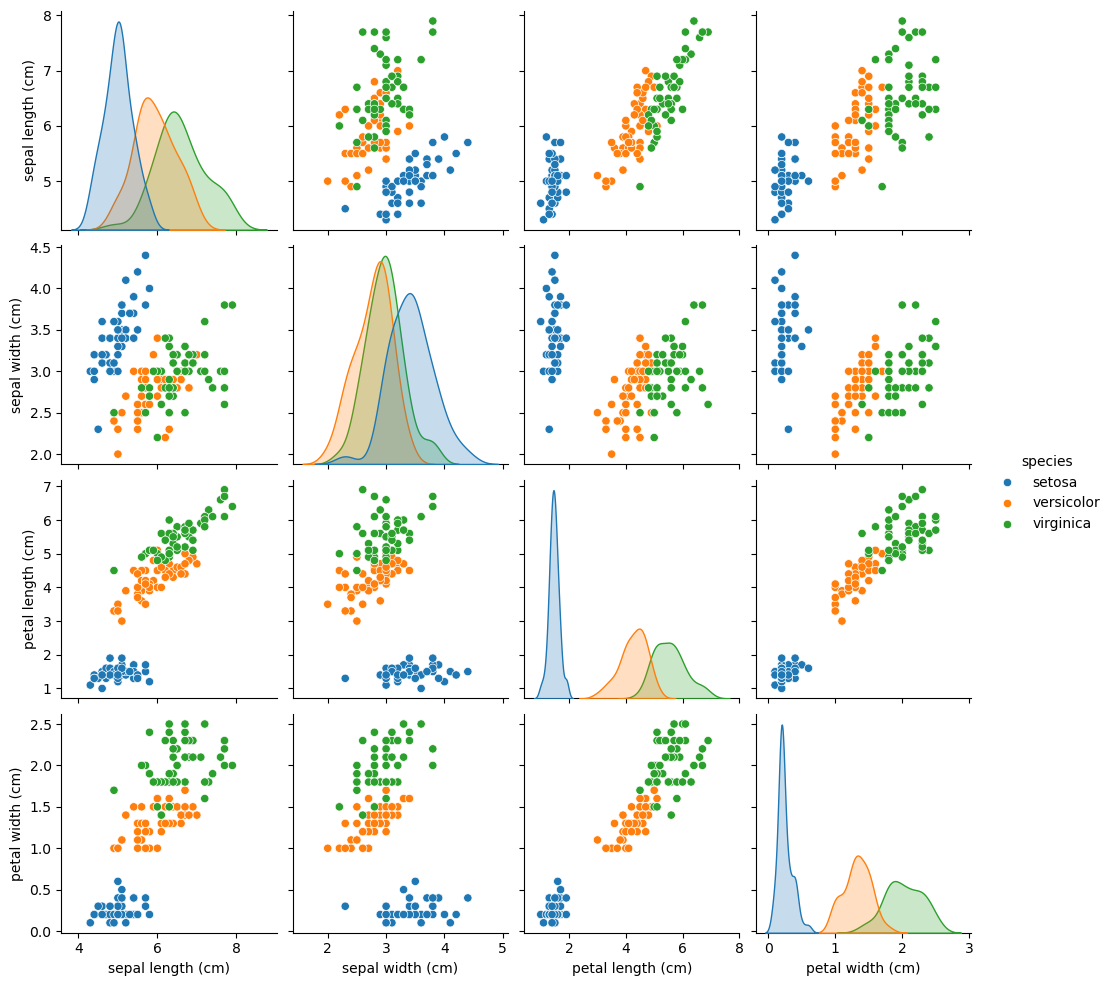

In [25]:
# Pairplot
sns.pairplot(iris_df, hue='species')
plt.show()


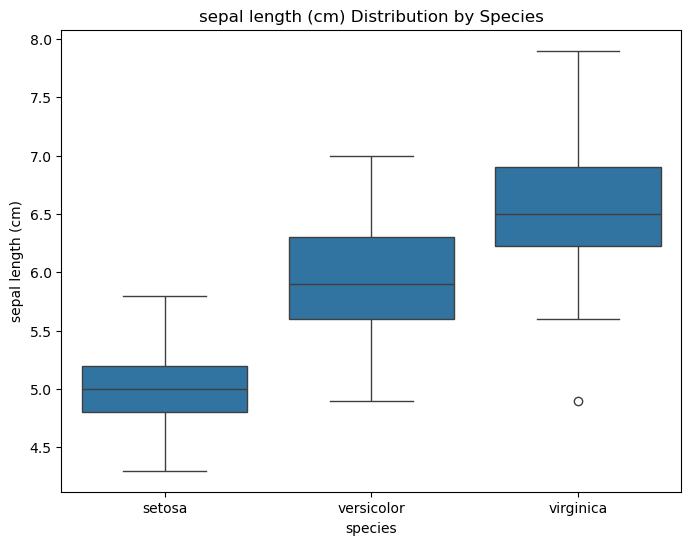

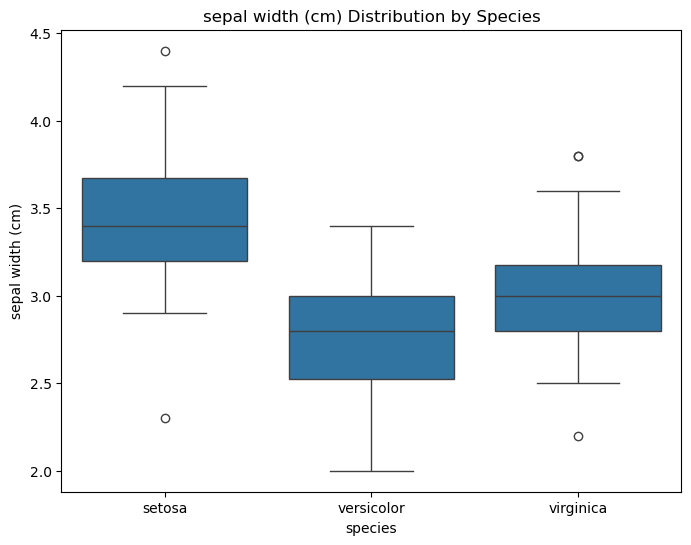

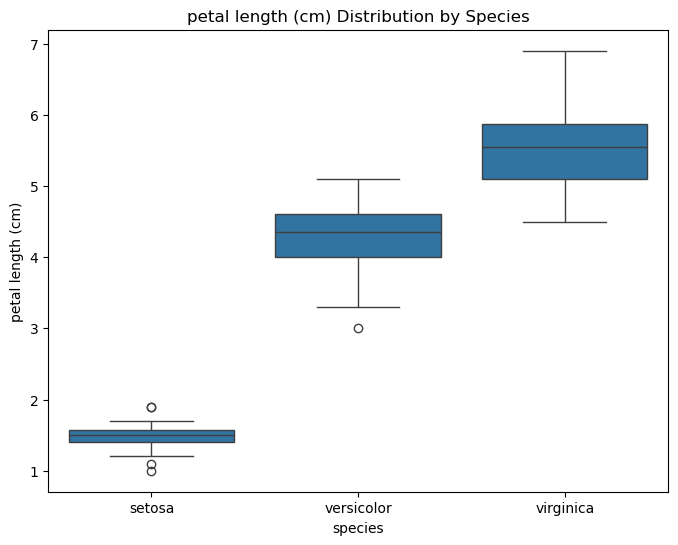

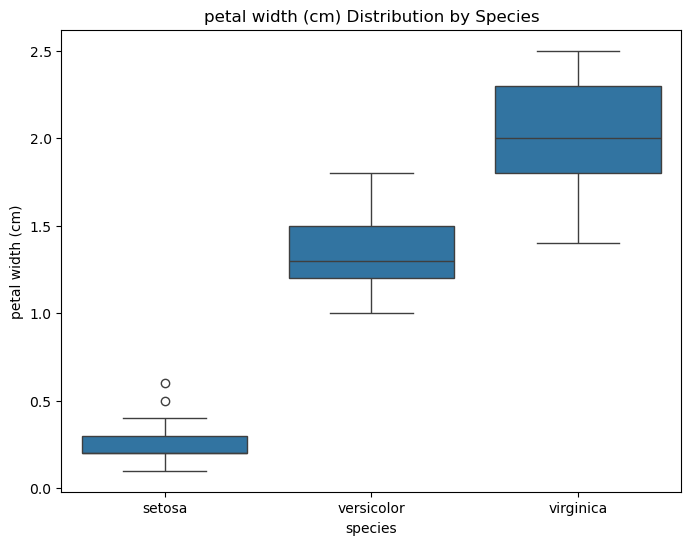

In [26]:

# Boxplots
features = iris_df.columns[:-1]

for feature in features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='species', y=feature, data=iris_df)
    plt.title(f'{feature} Distribution by Species')
    plt.show()

In [ ]:
# Feature types
feature_types = {col: 'numeric' for col in iris_df.columns[:-1]}
feature_types['species'] = 'nominal'

print("\nFeatures and their types:")
for feature, ftype in feature_types.items():
    print(f"- {feature}: {ftype}")

# Histograms
iris_df.hist(figsize=(12, 8))
plt.suptitle("Histograms of Each Feature", y=0.92)
plt.show()
